_Universidade Federal do Rio Grande do Sul_
##### **TRABALHO 1**
_Programa de Pós-Graduação em Engenharia Civil/Área de Estruturas_

_PPGEC-UFRGS / PEC00025 - Introdução à Teoria de Vibrações_

**Docente:** Marcelo Maia Rocha

**Acadêmico:** _Cristian de Campos_

**Matrícula:** _00312132_
### **Resposta de um sistema com 1 grau de liberdade a uma excitação na base: espectro de pseudo aceleração.**

 #### **1. Introdução**
 O propósito do trabalho é obter a resposta de um sistema de um grau de liberdade submetido a uma excitação vertical na base. A fim de captar a aceleração oferecida pelo sistema em resposta a excitação provocada artificialmente operou-se um smartphone da fabricante Samsung de modelo SM-G570M munido do iNVH, um software fornecido pela 'Robert Bosch Engineers' capaz de analisar e processar os dados oferecidos pelo hardware com limitação de captação de 100 Hz, para então apresentar ao usuário de forma gráfica e oferecer ao mesmo um arquivo de extensão _.csv_ o qual retém as informação obtidas.
 #### **2. Metodologia**
 O sistema analisado foi uma escada em aço. O aparelho foi posicionado no centro do vão do degrau médio do segundo lance da escada. A partir disso, se deu inicio a captura dos deslocamentos verticais do sistema, estando esse exposto a carga dinâmica causada pela cirulação de pessoas. A partir do suporte lógico Python, uma linguagem de programação de alto nível multiparadigma foi disponibilizada pelo professor Marcelo Maia Rocha uma rotina computacional apresentada como _"MRPy- Multivariate Random Processes with Python"_ desenvolvida pelo mesmo, a qual utiliza a técnica de integração de Duhamel, que foi utilizada para calcular e modelar como o sistema responde às perturbações oferecidas.
 #### **3. Desenvolvimento**
 A rotina implementada será apresentada sequenciamente a seguir

##### **3.1. Importação das Bibliotecas e do Módulo MRPy**
Foram utilizadas as seguintes bibliotecas e Módulos

In [1]:
#Importação das bibliotecas base para os cálculos dessa implementação computacional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from MRPy import MRPy

**3.1.1.** A biblioteca **Numpy** é extremamente necessária, pois permite trabalhar e operar inumeras funções, principalmente relacionado a vetores e matrizes.

**3.1.2.** A biblioteca **Pandas** foi utilizada essencialmente para a manipulação e análise dos dados coletados.

**3.1.3.** A biblioteca **Matplotlib** destinou-se à incorporar os gráficos necessários para a análise.

**3.1.4.** O módulo **MRPy** foi empregado na leitura do arquivo, bem como na maioria das integrações presentes no processo.

##### **3.2. Entrada de Dados**
Nesta etapa foram definidas as propriedades do sistema.

In [2]:
m  = 13        # system mass in kg (Foi considerado somente o degrau em uso, constituido inteiramente em aço)
fn = 1.0       # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity

##### **3.3. Leitura do arquivo**
Com o auxilio do módulo _MRPy_ foi realizada a leitura do arquivo _.csv_, que foi armazenado na pasta local do notebook com o nome "312132".

In [3]:
data = MRPy.from_file('312132', form='invh').zero_mean()            #Leitura do arquivo .csv
t    = data.t_axis()

##### **3.4. Apresentação gráfica da interpretação do arquivo**
Após a leitura e o processameto dos resultados presentes no arquivo, foi possível com o auxílio das funções oferecidas pela biblioteca _Matplotlib_ indicada como _plt_ exibir em forma gráfica as respectivas acelerações das direçoes (X, Y ,Z) em função do tempo decorrido.

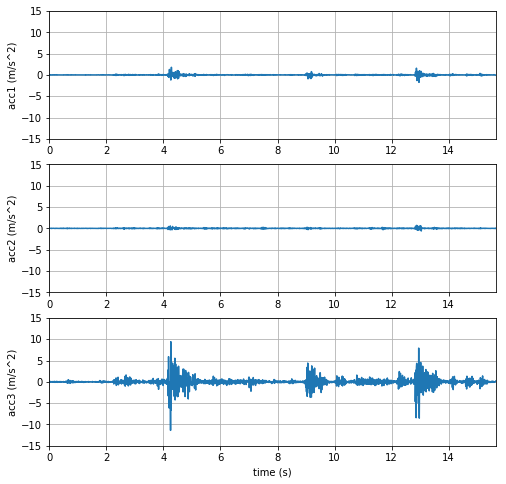

In [4]:
plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

##### **3.5. Separação da leitura na direção vertical**
Devido ao fato de a excitação ter sentido vertical, a leitura que nos intereça em termos de maior magnitudes de movimento é a em relação ao eixo Z. Por isso se fez necessário o isolamento da aceleração em relação ao tempo nesta orientação.

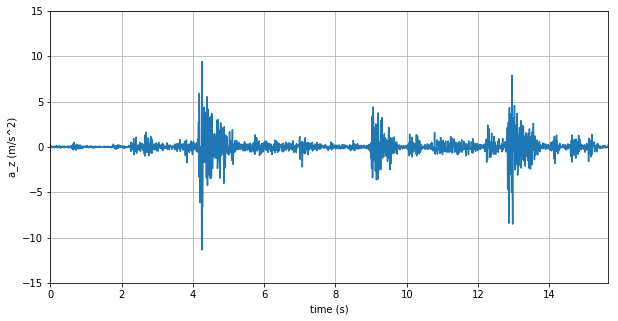

In [5]:
az = MRPy(data[2], data.fs)      #salvo na variavel 'az' o vetor correspondente as leituras de aceleração na orientação 'Z'
t  = az.t_axis()

plt.figure(7, figsize=(10, 5), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

##### **3.6. Encontrando os Deslocamentos**
Nesta etapa foram utiizados dois métodos de integração, cuja a entrada de dados para ambos se resume em:

    -Aceleração presente na variável 'az' em (m/s²);
    -Frequência natural salva na variável 'Fn'em (Hz);
    -Amortecimento salvo na variável 'zt' (adimensional);
    -Deslocamento inicial na variável 'u0' em (metros), o padrão é 0;
    -Velocidade inicial na variável 'v0' em (metros), o padrão é 0;
    
Sendo os métodos de intgração:

-**.sdof_fdiff**: Integra a equação diferencial pelo método das Diferenças Finitas Centrais;

-**.sdof_Duhamel**: Integra a equação diferencial pelo método de Duhamel;

O resultado das integrações são salvos nas variáveis _u_FD_ e _u_DH_ como listas contendo os deslocamentos são utilizados nesta célula para formar o gráfico dos delocamentos em relação ao tempo decorrido.

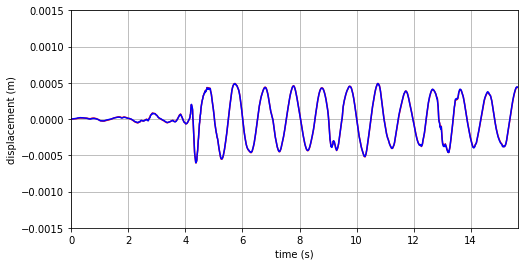

In [6]:
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m            
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.0015, 0.0015);   plt.ylabel('displacement (m)') 

plt.grid(True) 

##### **3.7. Aplicando diferentes frequências naturais**
Alterando os valores de frequência natural de 0 Hz a 30 Hz com passo de 0.05 Hz e atribuindo  o deslocamento máximo para cada caso podemos construir um grafico que apresenta os maiores deslocamentos em relação as respectivas frequências, além disso, de posse destes resultados é possível também compor o spectro de pseudo-acelerações conforme gráficos a seguir.

Maior deslocamento:                                     1.222539541041887   mm
Frequência natural deste deslocamento:                  2.9499999999999975 Hz
Rígidez da estrutura=                                   4466.29207962496 N/m
Força estática equivalente=                             5460.218669183714 N


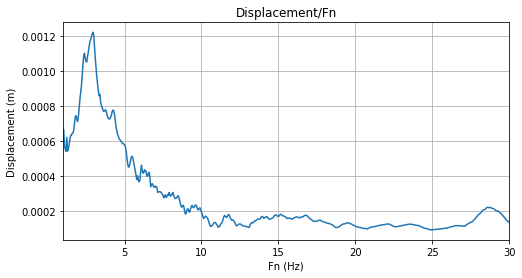

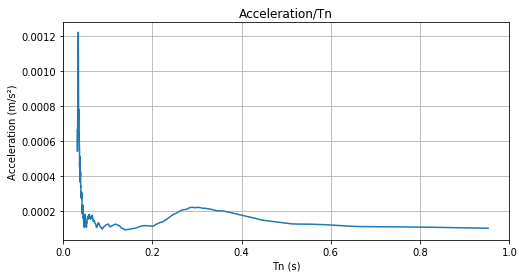

In [13]:
fn = 1                                         # Valor inicial da frequência natural
Lfn = []                                       # Lista para armazenamento das frequências naturais
Lumax=[]                                       # Lista para armazenamento dos maiores deslocamentos referentes a cada Fn 
Ltn = []                                       # Lista para armazenamento dos periodos
Apico = []                                     # Lista para armazenamento das acelerações de pico
for nume in range(600):
    fn += 0.05
    Lfn.append(fn)                             #Adicionando a frequência atual a lista 'Lfn'
    Ltn.append(1/fn)                           #Calculando e adicionando o periodo atual a lista 'Ltn'
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m   #Maneira empirica de descobrir o maior deslcamento em módulo
    mini=u_DH.min()                            #Maior deslocamento negativo
    maxi=u_DH.max()                            #Maior deslocamento positivo
    mini = mini * -1
    if mini>maxi:                              #Loop para comparar o maior desl. positivo com o maior desl. negativo
        Lumax.append(mini)
        apico=mini*(1/fn*fn)                   #Cálculo da maior aceleração de pico
        Apico.append(apico)                    #Adicionando a maior aceleração de pico atual à lista 'Apico'
    else:
        Lumax.append(maxi)
        apico=maxi*(1/fn*fn)                   #Cálculo da maior aceleração de pico
        Apico.append(apico)                    #Adicionando a maior aceleração de pico atual à lista 'Apico'

Mdesl=max(Lumax)                               #Buscando o maior deslocameto detre todos os maiores de cada Fn  
n_pos = Lumax.index(Mdesl)                     #Buscando a posição do maior descolcamento
M_fn=Lfn[n_pos]                                #Buscando a frequência natural que gerou o maior deslocamento
_wn=2*np.pi*M_fn                               #Cálculando a freuência ângular
k=_wn*_wn*m                                    #Cálculo da rigidez da estrutura correspondente
Feq=k*Mdesl                                    #Cálculo da Força equivalente ao deslocamento dinâmico sofrido pela estrutura
Feq=Feq*1000                                  
Mdesl=Mdesl*1000
print ('Maior deslocamento:                                    ',Mdesl,'  mm') 
print('Frequência natural deste deslocamento:                 ',M_fn,'Hz')
print('Rígidez da estrutura=                                  ',k,'N/m')
print('Força estática equivalente=                            ',Feq, 'N')

plt.figure(9, figsize=(8, 4), clear=True)
plt.plot(Lfn,Lumax)

plt.xlim(1, 30);        plt.xlabel('Fn (Hz)') 
plt.ylabel('Displacement (m)') 
plt.title('Displacement/Fn')
plt.grid(True) 

Ltn.reverse()

plt.figure(10, figsize=(8, 4), clear=True)
plt.plot(Ltn,Apico)

plt.xlim(0, 1);        plt.xlabel('Tn (s)') 
plt.ylabel('Acceleration (m/s²)') 
plt.title('Acceleration/Tn')
plt.grid(True)

##### **3.8. Periodograma**
Calcula-se o periodograma através de:

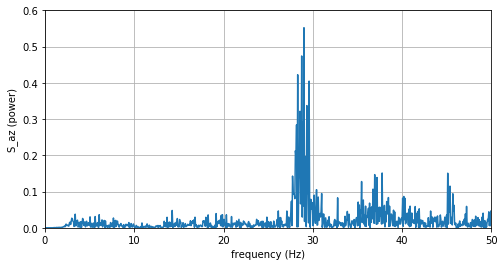

In [8]:
# Calls method for periodogram calculation and visualize

Saz, fs = az.periodogram()
f       = az.f_axis()
plt.figure(12, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])


plt.xlim(0, 50);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.6);   plt.ylabel('S_az (power)') 

plt.grid(True)

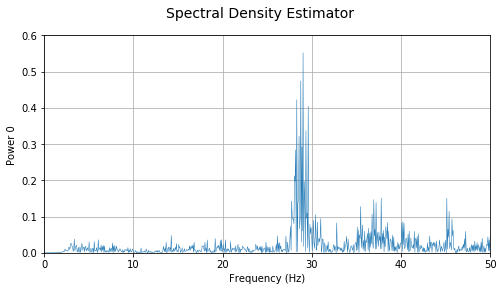

In [9]:
fig13 = az.plot_freq(fig=13, figsize=(8,4) , axis_f=(0, 50, 0, 0.6))

##### **3.9. Periodograma de saída**
Calcula-se o periodograma de saída através da integral rápide Duhamel de:

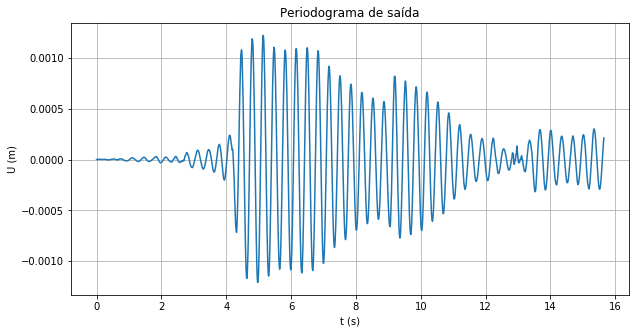

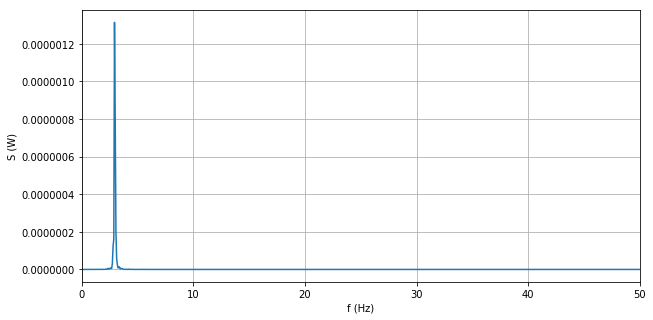

In [10]:
fnsaida = M_fn
uout = az.sdof_Duhamel(fnsaida, zt, u0, v0)/m

plt.figure(figsize=(10, 5))
plt.title("Periodograma de saída")
plt.plot(t, uout[0])
plt.xlabel('t (s)') 
plt.ylabel('U (m)')

plt.grid(True)

Sout, fsout = uout.periodogram()
fout = uout.f_axis()

plt.figure(figsize=(10, 5))
plt.plot(fout, Sout[0])
plt.xlim(0, 15); plt.xlabel('f (Hz)') 
plt.xlim(0, 50); plt.ylabel('S (W)') 

plt.grid(True)

##### **4. Conclusão**
A partir dos cálculos e análise deos resultados, constatou-se que o maior deslocamento (U=1.22mm) se refere a frequência de 2.95 $Hz$. Os deslocamentos dinâmicos sofridos pelo sistema correspondem em seu valor máximo a uma força estática de 5.46 $Kn$.